# __Football Social Network Analysis__

In [1]:
%matplotlib inline
import networkx as nx
import pandas as pd
import numpy as np


import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl

from networkx.algorithms import community
from collections import OrderedDict

My analysis is based around the ‘Football’ dataset taken from the external source, Pajek (Krempel, 2005). The dataset describes 22 soccer teams which participated in the World Championships in Paris, 1998.

In [2]:
G = nx.read_pajek('football.net.txt')

In [3]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

The data comes in a multidigraph format which tells us that there are multiple edges between two nodes and each edge can hold optional data or attributes (MultiDiGraph, 2022).

# __Data Manipulation__

In [4]:
nx.info(G)

'MultiDiGraph with 35 nodes and 118 edges'

The network contains 35 vertices (nodes) and 118 edges. Countries are the nodes and the players contracted are the edges. According to the number of nodes and edges, the dataset appears to be of good size to visualise the relationship between actors. 

In [5]:
G.nodes

NodeView(('ARG', 'AUT', 'BEL', 'BGR', 'BRA', 'CHE', 'CHL', 'CMR', 'COL', 'DEU', 'DNK', 'ESP', 'FRA', 'GBR', 'GRE', 'HRV', 'IRN', 'ITA', 'JAM', 'JPN', 'KOR', 'MAR', 'MEX', 'NGA', 'NLD', 'NOR', 'PRT', 'PRY', 'ROM', 'SCO', 'TUN', 'TUR', 'USA', 'YUG', 'ZAF'))

In [6]:
G.edges

OutMultiEdgeView([('ARG', 'ESP', 0), ('ARG', 'ITA', 0), ('AUT', 'DEU', 0), ('AUT', 'ESP', 0), ('AUT', 'FRA', 0), ('AUT', 'GBR', 0), ('AUT', 'ITA', 0), ('BEL', 'DEU', 0), ('BEL', 'FRA', 0), ('BEL', 'ITA', 0), ('BEL', 'NLD', 0), ('BGR', 'DEU', 0), ('BGR', 'ESP', 0), ('BGR', 'PRT', 0), ('BGR', 'TUR', 0), ('BRA', 'ESP', 0), ('BRA', 'FRA', 0), ('BRA', 'ITA', 0), ('BRA', 'JPN', 0), ('BRA', 'PRT', 0), ('CHL', 'ARG', 0), ('CHL', 'ITA', 0), ('CHL', 'USA', 0), ('CMR', 'AUT', 0), ('CMR', 'DEU', 0), ('CMR', 'ESP', 0), ('CMR', 'FRA', 0), ('CMR', 'GRE', 0), ('CMR', 'ITA', 0), ('CMR', 'JPN', 0), ('CMR', 'PRT', 0), ('CMR', 'TUR', 0), ('COL', 'ARG', 0), ('COL', 'BRA', 0), ('COL', 'ESP', 0), ('COL', 'ITA', 0), ('COL', 'USA', 0), ('DEU', 'ESP', 0), ('DEU', 'FRA', 0), ('DEU', 'ITA', 0), ('DNK', 'DEU', 0), ('DNK', 'ESP', 0), ('DNK', 'GBR', 0), ('DNK', 'ITA', 0), ('DNK', 'NLD', 0), ('DNK', 'SCO', 0), ('DNK', 'TUR', 0), ('HRV', 'AUT', 0), ('HRV', 'DEU', 0), ('HRV', 'ESP', 0), ('HRV', 'GBR', 0), ('HRV', 'ITA'

In [7]:
pos = nx.kamada_kawai_layout(G)
pos

{'ARG': array([0.51787749, 0.38394522]),
 'AUT': array([0.04981781, 0.2646658 ]),
 'BEL': array([0.42224373, 0.30474313]),
 'BGR': array([-0.27778389, -0.3713869 ]),
 'BRA': array([ 0.15011297, -0.23917832]),
 'CHE': array([ 0.048623  , -0.11395203]),
 'CHL': array([0.21974413, 0.34063813]),
 'CMR': array([0.26754365, 0.06936692]),
 'COL': array([-0.30856692,  0.17096105]),
 'DEU': array([ 0.11635474, -0.17628996]),
 'DNK': array([0.13497584, 0.16899634]),
 'ESP': array([-0.1620169 , -0.04457355]),
 'FRA': array([-0.07369918, -0.0130635 ]),
 'GBR': array([0.14555587, 0.5973869 ]),
 'GRE': array([0.11498157, 0.26982022]),
 'HRV': array([0.30312711, 0.26544813]),
 'IRN': array([ 0.18449131, -0.96494286]),
 'ITA': array([-0.11738347,  0.28345947]),
 'JAM': array([-0.57355528, -1.        ]),
 'JPN': array([ 0.38901131, -0.34034165]),
 'KOR': array([-0.28505136,  0.14021405]),
 'MAR': array([-0.36818996,  0.12851144]),
 'MEX': array([-0.96552426, -0.30198989]),
 'NGA': array([ 0.29875332, -

In [8]:
cen = [('ARG', 'ESP'), ('ARG', 'ITA'), ('AUT', 'DEU'), ('AUT', 'ESP'), ('AUT', 'FRA'), ('AUT', 'GBR'), ('AUT', 'ITA'), ('BEL', 'DEU'), ('BEL', 'FRA'), ('BEL', 'ITA'), ('BEL', 'NLD'), ('BGR', 'DEU'), ('BGR', 'ESP'), ('BGR', 'PRT'), ('BGR', 'TUR'), ('BRA', 'ESP'), ('BRA', 'FRA'), ('BRA', 'ITA'), ('BRA', 'JPN'), ('BRA', 'PRT'), ('CHL', 'ARG'), ('CHL', 'ITA'), ('CHL', 'USA'), ('CMR', 'AUT'), ('CMR', 'DEU'), ('CMR', 'ESP'), ('CMR', 'FRA'), ('CMR', 'GRE'), ('CMR', 'ITA'), ('CMR', 'JPN'), ('CMR', 'PRT'), ('CMR', 'TUR'), ('COL', 'ARG'), ('COL', 'BRA'), ('COL', 'ESP'), ('COL', 'ITA'), ('COL', 'USA'), ('DEU', 'ESP'), ('DEU', 'FRA'), ('DEU', 'ITA'), ('DNK', 'DEU'), ('DNK', 'ESP'), ('DNK', 'GBR'), ('DNK', 'ITA'), ('DNK', 'NLD'), ('DNK', 'SCO'), ('DNK', 'TUR'), ('HRV', 'AUT'), ('HRV', 'DEU'), ('HRV', 'ESP'), ('HRV', 'GBR'), ('HRV', 'ITA'), ('HRV', 'TUR'), ('IRN', 'DEU'), ('ITA', 'ESP'), ('ITA', 'FRA'), ('ITA', 'GBR'), ('JAM', 'GBR'), ('KOR', 'FRA'), ('KOR', 'JPN'), ('MAR', 'DEU'), ('MAR', 'ESP'), ('MAR', 'FRA'), ('MAR', 'ITA'), ('MAR', 'PRT'), ('MAR', 'TUN'), ('NGA', 'BEL'), ('NGA', 'CHE'), ('NGA', 'DEU'), ('NGA', 'ESP'), ('NGA', 'FRA'), ('NGA', 'ITA'), ('NGA', 'NLD'), ('NGA', 'TUR'), ('NGA', 'USA'), ('NGA', 'ZAF'), ('NLD', 'DEU'), ('NLD', 'ESP'), ('NLD', 'GBR'), ('NLD', 'ITA'), ('NOR', 'DEU'), ('NOR', 'ESP'), ('NOR', 'GBR'), ('NOR', 'GRE'), ('NOR', 'ITA'), ('NOR', 'SCO'), ('PRY', 'BRA'), ('PRY', 'ESP'), ('PRY', 'MEX'), ('ROM', 'BEL'), ('ROM', 'DEU'), ('ROM', 'ESP'), ('ROM', 'GBR'), ('ROM', 'GRE'), ('ROM', 'NLD'), ('ROM', 'TUR'), ('SCO', 'FRA'), ('SCO', 'GBR'), ('TUN', 'DEU'), ('TUN', 'FRA'), ('USA', 'DEU'), ('USA', 'GBR'), ('USA', 'NLD'), ('YUG', 'DEU'), ('YUG', 'ESP'), ('YUG', 'FRA'), ('YUG', 'GBR'), ('YUG', 'ITA'), ('YUG', 'JPN'), ('ZAF', 'AUT'), ('ZAF', 'CHE'), ('ZAF', 'DEU'), ('ZAF', 'ESP'), ('ZAF', 'FRA'), ('ZAF', 'GBR'), ('ZAF', 'ITA'), ('ZAF', 'NLD'), ('ZAF', 'TUR')]

The dataset does not require much cleaning since it is already in a useable format.

I have extracted further data from Wikipedia on overall performance points from the World Championships in Paris, 1998 (1998 FIFA World Cup - Wikipedia, 2022) and Pajeck (Krempel, 2022) on player import and exports. This data was combined to supplement analysis: 

In [9]:
points = pd.read_csv('footballpoints.csv')

In [10]:
points.replace('\\N',np.nan,inplace=True)

In [11]:
#Table A
points

,country_code,country_name,input_degree_import,output_degree_export,characteristic,values_input_degree,valued_output_degree,points
0,ARG,Argentina,2,2,export/importer,4,13,10.0
1,AUT,Austria,3,5,export,3,11,2.0
2,BEL,Belgium,2,4,export,3,8,3.0
3,BGR,Bulgaria,0,4,export,0,10,1.0
4,BRA,Brazil,2,5,export,12,12,13.0
5,CHE,Switzerland,2,0,import,2,0,NaN
6,CHL,Chile,0,3,export,0,3,3.0
7,CMR,Cameroon,0,9,export,0,20,2.0
8,COL,Colombia,0,5,export,0,9,3.0
9,DEU,Germany,16,3,import,39,4,10.0


# __Data Analysis: Graphical Interpretation__

No handles with labels found to put in legend.


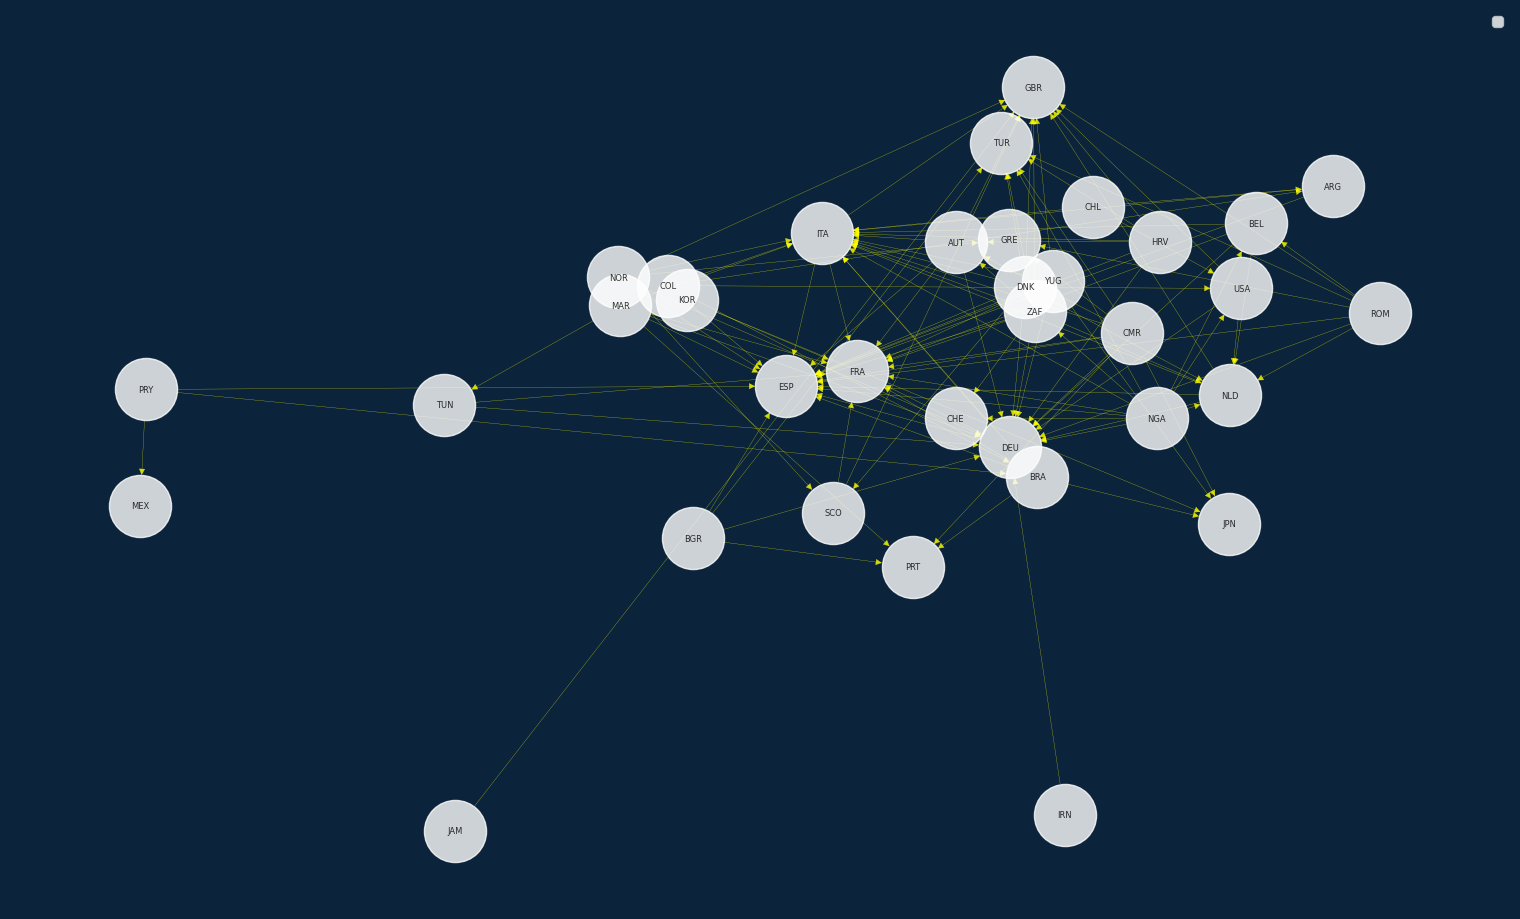

In [12]:
#Graph 1
pd.set_option('precision',10)
C = nx.Graph()
C.add_edges_from(cen)
size = [x*4000 for x in list(nx.degree_centrality(C).values())]

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size=2000, with_labels= True,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

In [13]:
#Testing the eccentricity of a node and the maximum distance from node (v) to all other nodes in C
nx.eccentricity(C)

{'ARG': 3,
 'ESP': 3,
 'ITA': 3,
 'AUT': 3,
 'DEU': 3,
 'FRA': 3,
 'GBR': 4,
 'BEL': 4,
 'NLD': 3,
 'BGR': 4,
 'PRT': 4,
 'TUR': 4,
 'BRA': 3,
 'JPN': 4,
 'CHL': 4,
 'USA': 4,
 'CMR': 3,
 'GRE': 4,
 'COL': 3,
 'DNK': 3,
 'SCO': 4,
 'HRV': 3,
 'IRN': 4,
 'JAM': 5,
 'KOR': 4,
 'MAR': 3,
 'TUN': 4,
 'NGA': 3,
 'CHE': 4,
 'ZAF': 3,
 'NOR': 3,
 'PRY': 4,
 'MEX': 5,
 'ROM': 3,
 'YUG': 3}

In [14]:
#Testing the lower bound on the diameter of the graph
nx.diameter(C)

5

In [15]:
#Calculate the set of nodes with eccentricity equal to the diameter
nx.periphery(C)

['JAM', 'MEX']

In [16]:
#Estimating the average clustering coefficient of C
nx.approximation.average_clustering(C)

0.338

The values obtained for the eccentricity are either equal to the diameter of 5 or a value less than that. Both figures indicate we are working with a sparse graph and research supports that the lower bound calculated via the diameter holds for even sparse graphs (Backurs et al., 2021). Jamacia and Mexico are the set of nodes with eccentricity equal to the diameter. The coefficient value of 0.35 (rounded to 2dp) also indicates there is a weak positive relationship between the nodes. 

In [17]:
#Testing whether any edges joining two nodes are not adjacent in the cycle
nx.is_chordal(C)

False

In [18]:
#Computing the fraction of possible triangles present in C identified by the number of triads
nx.transitivity(C)

0.32926829268292684

The unweighted transitivity value of 0.33 (rounded to 2dp) implies a positive ratio of all triangles over possible triangles in the sample. We know that the graph is relatively sparse which explains why there is a likelihood of greater possible triangles as the nodes that already have lots of connections are likely to be part of these enclosed triangles. 

In [19]:
#Testing clustering and number of triangles - each triangle is counted as a triange for each of the three nodes
nx.triangles(C)

{'ARG': 4,
 'ESP': 37,
 'ITA': 53,
 'AUT': 19,
 'DEU': 47,
 'FRA': 22,
 'GBR': 15,
 'BEL': 11,
 'NLD': 26,
 'BGR': 1,
 'PRT': 0,
 'TUR': 1,
 'BRA': 5,
 'JPN': 0,
 'CHL': 1,
 'USA': 4,
 'CMR': 9,
 'GRE': 0,
 'COL': 5,
 'DNK': 9,
 'SCO': 2,
 'HRV': 8,
 'IRN': 0,
 'JAM': 0,
 'KOR': 0,
 'MAR': 7,
 'TUN': 3,
 'NGA': 21,
 'CHE': 1,
 'ZAF': 22,
 'NOR': 5,
 'PRY': 1,
 'MEX': 0,
 'ROM': 6,
 'YUG': 6}

In [20]:
#Finding the maximum clique in the dataset
nx.approximation.max_clique(C)

{'DEU', 'ESP', 'ITA', 'NGA', 'NLD', 'ZAF'}

The results indicate that Italy (ITA), Germany (DEU), Spain (ESP), Nigeria (NGA), Netherlands (NLD) and South Africa (ZAF) are the top countries that have the most triangles. These countries have the largest cliques in the sample which indicates they are closely connected in terms of player contracts imported or exported to other countries within the dataset. This could imply that players from the countries with the largest cliques are in high demand for their players or these countries import players from other countries as they do not have a good enough selection of domestic players. 

In [21]:
#Select a list of influential nodes in a graph using VoteRank algorithm
nx.voterank(C)

['ITA',
 'DEU',
 'ESP',
 'FRA',
 'GBR',
 'CMR',
 'NGA',
 'BRA',
 'ROM',
 'ZAF',
 'TUR',
 'ARG',
 'MAR',
 'NOR',
 'JPN',
 'USA',
 'PRY',
 'BGR',
 'DNK',
 'AUT',
 'NLD']

The most influential nodes give indication of the countries that are the most influential in terms of the players they import and export. The list corresponds to the trend seen in graph 1 as the most influential nodes are clustered together and have greater connections with other influential countries.

In [22]:
#Finding the approximate maximum independent set
nx.approximation.maximum_independent_set(C)

{'ARG',
 'AUT',
 'BEL',
 'BGR',
 'BRA',
 'CHE',
 'DNK',
 'GRE',
 'IRN',
 'JAM',
 'KOR',
 'MAR',
 'MEX',
 'USA',
 'YUG'}

The maximum independent set gives an indication as to which countries are the most independent in terms of stability of vertices in the graph, of which no two are adjacent. This means that for the countries listed in the table above such that for every two vertices, there is no edge connecting the two (Calculate a maximal independent set with Python – Spark & Shine, 2016). This could imply that these countries are less significant in terms of importing and exporting player contracts. 

In [23]:
#Computing the degree assortativity of the C
nx.degree_assortativity_coefficient(C)

-0.17625333295646237

From the degree assortativity coefficient value of -0.18 (rounded to 2dp) we can tell there is a negative correlation between nodes of a different degree. This implies disassortativity and the nodes (countries) have dissimilar properties within the network. Such disassortativity arises because there are simply not enough hub nodes available for themselves to connect to each other to main assortativity (Sayama, 2020). This could indicate a disproportionate number of talented players in each country of the sample.

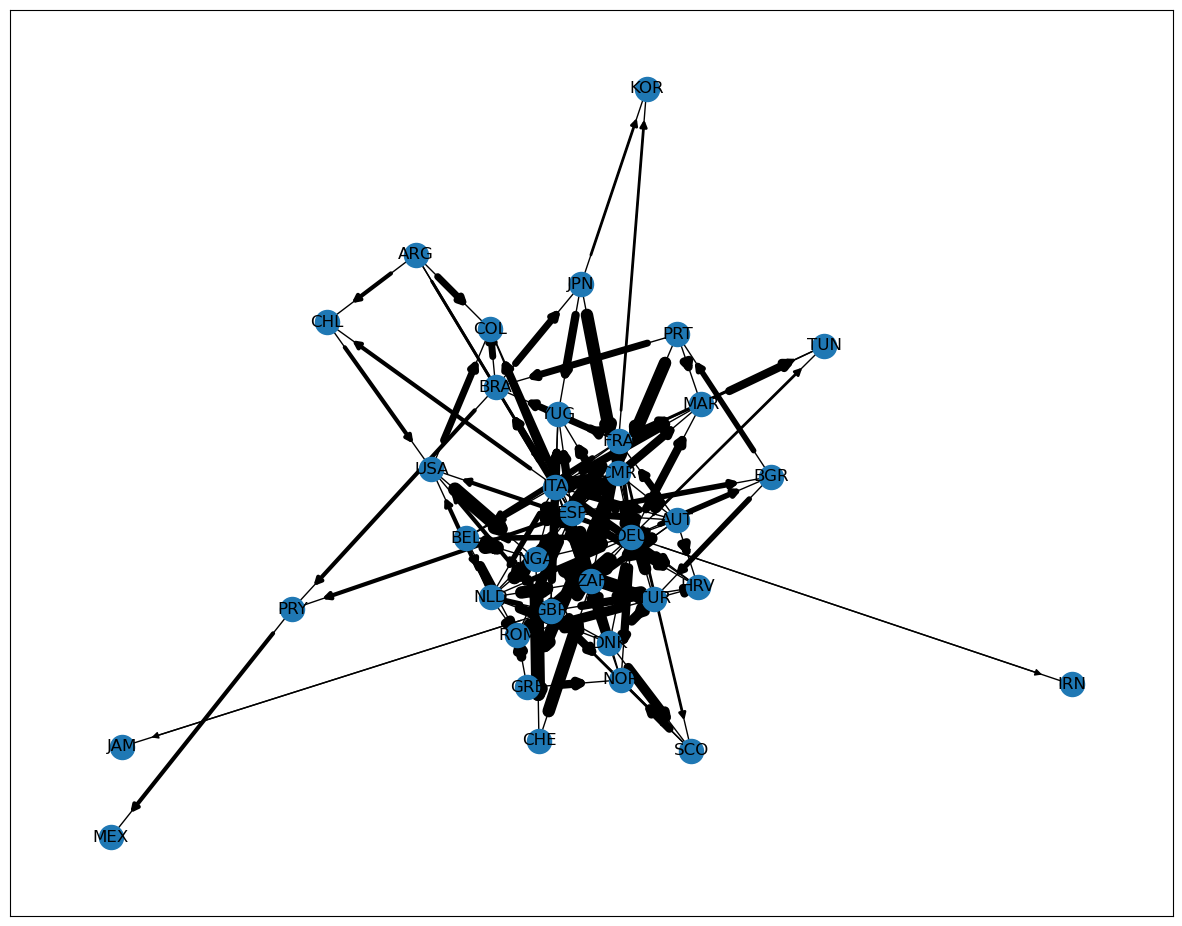

In [24]:
#Graph2
g = nx.Graph()

g.add_edge('ARG', 'ESP', weight=2)
g.add_edge('ARG', 'ITA', weight=2)
g.add_edge('AUT', 'DEU', weight=5)
g.add_edge('AUT', 'ESP', weight=5)
g.add_edge('AUT', 'FRA', weight=5)
g.add_edge('AUT', 'GBR', weight=5)
g.add_edge('AUT', 'ITA', weight=5)
g.add_edge('BEL', 'DEU', weight=4)
g.add_edge('BEL', 'FRA', weight=4)
g.add_edge('BEL', 'ITA', weight=4)
g.add_edge('BEL', 'NLD', weight=4)
g.add_edge('BGR', 'DEU', weight=4)
g.add_edge('BGR', 'ESP', weight=4)
g.add_edge('BGR', 'PRT', weight=4)
g.add_edge('BGR', 'TUR', weight=4)
g.add_edge('BRA', 'ESP', weight=5)
g.add_edge('BRA', 'FRA', weight=5)
g.add_edge('BRA', 'ITA', weight=5)
g.add_edge('BRA', 'JPN', weight=5)
g.add_edge('BRA', 'PRT', weight=5)
g.add_edge('CHL', 'ARG', weight=3)
g.add_edge('CHL', 'ITA', weight=3)
g.add_edge('CHL', 'USA', weight=3)
g.add_edge('CMR', 'AUT', weight=9)
g.add_edge('CMR', 'DEU', weight=9)
g.add_edge('CMR', 'ESP', weight=9)
g.add_edge('CMR', 'FRA', weight=9)
g.add_edge('CMR', 'GRE', weight=9)
g.add_edge('CMR', 'ITA', weight=9)
g.add_edge('CMR', 'JPN', weight=9)
g.add_edge('CMR', 'PRT', weight=9)
g.add_edge('CMR', 'TUR', weight=9)
g.add_edge('COL', 'ARG', weight=5)
g.add_edge('COL', 'BRA', weight=5)
g.add_edge('COL', 'ESP', weight=5)
g.add_edge('COL', 'ITA', weight=5)
g.add_edge('COL', 'USA', weight=5)
g.add_edge('DEU', 'ESP', weight=3)
g.add_edge('DEU', 'FRA', weight=3)
g.add_edge('DEU', 'ITA', weight=3)
g.add_edge('DNK', 'DEU', weight=7)
g.add_edge('DNK', 'ESP', weight=7)
g.add_edge('DNK', 'GBR', weight=7)
g.add_edge('DNK', 'ITA', weight=7)
g.add_edge('DNK', 'NLD', weight=7)
g.add_edge('DNK', 'SCO', weight=7)
g.add_edge('DNK', 'TUR', weight=7)
g.add_edge('HRV', 'AUT', weight=6)
g.add_edge('HRV', 'DEU', weight=6)
g.add_edge('HRV', 'ESP', weight=6)
g.add_edge('HRV', 'GBR', weight=6)
g.add_edge('HRV', 'ITA', weight=6)
g.add_edge('HRV', 'TUR', weight=6)
g.add_edge('IRN', 'DEU', weight=1)
g.add_edge('ITA', 'ESP', weight=3)
g.add_edge('ITA', 'FRA', weight=3)
g.add_edge('ITA', 'GBR', weight=3)
g.add_edge('JAM', 'GBR', weight=1)
g.add_edge('KOR', 'FRA', weight=2)
g.add_edge('KOR', 'JPN', weight=2)
g.add_edge('MAR', 'DEU', weight=6)
g.add_edge('MAR', 'ESP', weight=6)
g.add_edge('MAR', 'FRA', weight=6)
g.add_edge('MAR', 'ITA', weight=6)
g.add_edge('MAR', 'PRT', weight=6)
g.add_edge('MAR', 'TUN', weight=6)
g.add_edge('NGA', 'BEL', weight=10)
g.add_edge('NGA', 'CHE', weight=10)
g.add_edge('NGA', 'DEU', weight=10)
g.add_edge('NGA', 'ESP', weight=10)
g.add_edge('NGA', 'FRA', weight=10)
g.add_edge('NGA', 'ITA', weight=10)
g.add_edge('NGA', 'NLD', weight=10)
g.add_edge('NGA', 'TUR', weight=10)
g.add_edge('NGA', 'USA', weight=10)
g.add_edge('NGA', 'ZAF', weight=10)
g.add_edge('NLD', 'DEU', weight=4)
g.add_edge('NLD', 'ESP', weight=4)
g.add_edge('NLD', 'GBR', weight=4)
g.add_edge('NLD', 'ITA', weight=4)
g.add_edge('NOR', 'DEU', weight=6)
g.add_edge('NOR', 'ESP', weight=6)
g.add_edge('NOR', 'GBR', weight=6)
g.add_edge('NOR', 'GRE', weight=6)
g.add_edge('NOR', 'ITA', weight=6)
g.add_edge('NOR', 'SCO', weight=6)
g.add_edge('PRY', 'BRA', weight=3)
g.add_edge('PRY', 'ESP', weight=3)
g.add_edge('PRY', 'MEX', weight=3)
g.add_edge('ROM', 'BEL', weight=7)
g.add_edge('ROM', 'DEU', weight=7)
g.add_edge('ROM', 'ESP', weight=7)
g.add_edge('ROM', 'GBR', weight=7)
g.add_edge('ROM', 'GRE', weight=7)
g.add_edge('ROM', 'NLD', weight=7)
g.add_edge('ROM', 'TUR', weight=7)
g.add_edge('SCO', 'FRA', weight=2)
g.add_edge('SCO', 'GBR', weight=2)
g.add_edge('TUN', 'DEU', weight=2)
g.add_edge('TUN', 'FRA', weight=2)
g.add_edge('USA', 'DEU', weight=3)
g.add_edge('USA', 'GBR', weight=3)
g.add_edge('USA', 'NLD', weight=3)
g.add_edge('YUG', 'DEU', weight=6)
g.add_edge('YUG', 'ESP', weight=6)
g.add_edge('YUG', 'FRA', weight=6)
g.add_edge('YUG', 'GBR', weight=6)
g.add_edge('YUG', 'ITA', weight=6)
g.add_edge('YUG', 'JPN', weight=6)
g.add_edge('ZAF', 'AUT', weight=9)
g.add_edge('ZAF', 'CHE', weight=9)
g.add_edge('ZAF', 'DEU', weight=9)
g.add_edge('ZAF', 'ESP', weight=9)
g.add_edge('ZAF', 'FRA', weight=9)
g.add_edge('ZAF', 'GBR', weight=9)
g.add_edge('ZAF', 'ITA', weight=9)
g.add_edge('ZAF', 'NLD', weight=9)
g.add_edge('ZAF', 'TUR', weight=9)

pos = nx.spring_layout(g, seed=0)
fig = plt.figure(figsize = (15,12), dpi=100)
nx.draw_networkx(g, pos)

for edge in g.edges(data='weight'):
    nx.draw_networkx_edges(g, pos, edgelist=[edge], width=edge[2], edge_cmap=plt.cm.Blues, node_size=2000, arrows=True)

From graph 1 we can see the 2-mode relation where player i has a contract in the country j [arc(i,j)]. The direction of the arrows also tells us something about whether each country exports or imports players. The net exporters from the sample are Austria, Belgium, Bulgaria, Brazil, Chile, Cameroon, Colombia, Denmark, Croatia, Iran, Jamaica, South Korea, Morocco, Nigeria, Norway, Paraguay, Romania, Tunisia, Yugoslavia and South Africa. The net importers from the sample are Switzerland, Germany, Spain, France, United Kingdom, Greece, Italy, Japan, Mexico, Netherlands, Portugal and Turkey. The countries that are equally importers and exporters are Argentina, Scotland and United States. 

Graph 2 has been built to visualise the thickness of edges based on their weight. The weight was determined using figures from the 'output_degree_export' column in table A. The figures determine the extent to which each country exports player contracts and we can see from the graph that a thicker edge corresponds to the country exporting the most contracts. There are a cluster of countries within the centre of the graph, and these are mainly the countries we identified as net exporters. Seeing this area of concentration sparks some concern as there may be export trade restrictions on the number of players each country can export. This could possibly result in unfair advantages during the World Championships if some countries are recruiting the best talent from abroad. 

If we refer to the developed countries list 2022, we can see that most of the countries who are net importers in our sample have a higher Human Development Index (HDI) than most of the countries who are net exporters (Developed Countries List 2022, 2022). This economic mapping amongst players across different countries could demonstrate that more economically developed countries have greater financial resource to import players than less economically developed countries. Consequently, this means they end up with better leagues as they have imported the best talent from less economically developed countries with good players. The mapping emphasises the idea that some countries operate as a transfer hub (Ec.europa.eu, 2013). 

# __Data Analysis: Measures of Centrality__

Degree Centrality

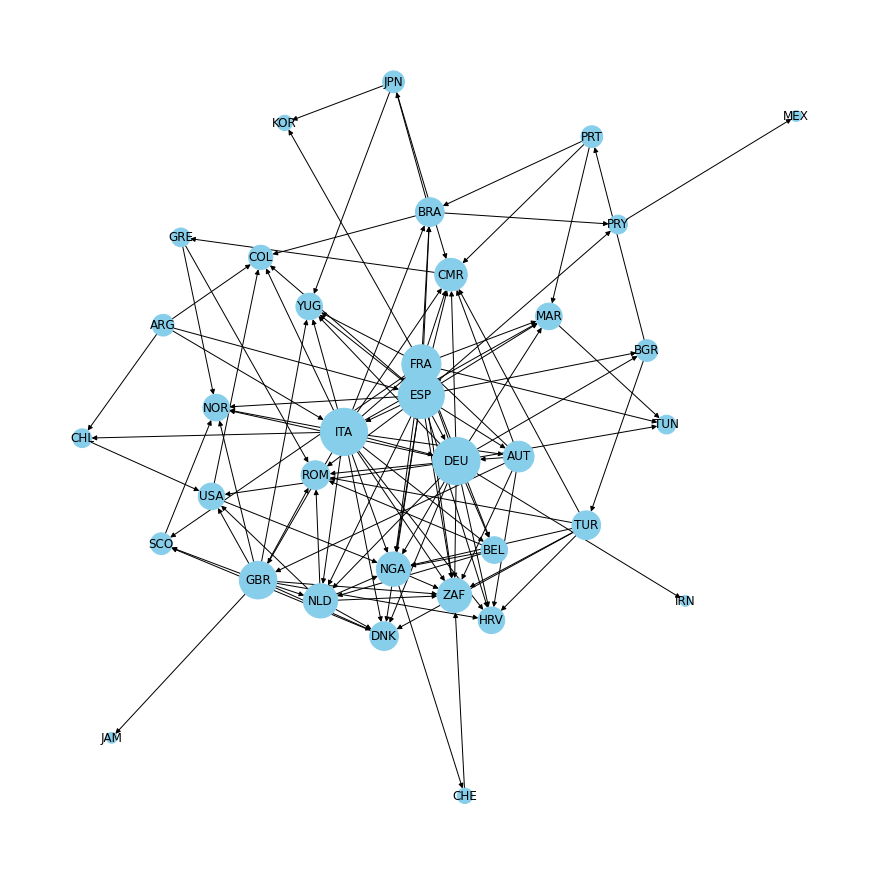

In [25]:
#Graph 3
D = nx.Graph()
D.add_edges_from(cen)
size = [x*4000 for x in list(nx.degree_centrality(D).values())]

plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(D) 
nx.draw(D, with_labels=True, node_color='skyblue', node_size=size, edge_cmap=plt.cm.Blues, arrows=True, pos = pos)
plt.show()

In [26]:
OrderedDict(sorted(nx.degree_centrality(D).items()))

OrderedDict([('ARG', 0.11764705882352941),
             ('AUT', 0.23529411764705882),
             ('BEL', 0.1764705882352941),
             ('BGR', 0.11764705882352941),
             ('BRA', 0.20588235294117646),
             ('CHE', 0.058823529411764705),
             ('CHL', 0.08823529411764705),
             ('CMR', 0.2647058823529412),
             ('COL', 0.14705882352941177),
             ('DEU', 0.5588235294117647),
             ('DNK', 0.20588235294117646),
             ('ESP', 0.5294117647058824),
             ('FRA', 0.38235294117647056),
             ('GBR', 0.3529411764705882),
             ('GRE', 0.08823529411764705),
             ('HRV', 0.1764705882352941),
             ('IRN', 0.029411764705882353),
             ('ITA', 0.5588235294117647),
             ('JAM', 0.029411764705882353),
             ('JPN', 0.11764705882352941),
             ('KOR', 0.058823529411764705),
             ('MAR', 0.1764705882352941),
             ('MEX', 0.029411764705882353),
             (

The degree centrality tells us which node ranks importance according to connectivity. Results from the data tell us that Germany, Italy and Spain have the highest level of degree centrality amongst all other actors. From graph 3 we can see that the node size is largest for these three countries as they have the highest connectivity to other nodes. This can also be seen from table A as these countries import players from the highest number of different countries – Spain (18 contracts), Italy (16 contracts) and Germany (16 contracts). 

It can be questioned why Nigeria is not an important hub since it exports the most players (10 contracts). From table A we can see that Nigeria exports a lower number of players than the top importers. This could explain that degree centrality is not counting the number of players but only where players are exported. Research also suggest that Nigeria exports a much smaller proportion of its players to the best leagues (authorities) than Yugoslavia and Norway (Kleinberg, 2022).  

Closeness Centrality

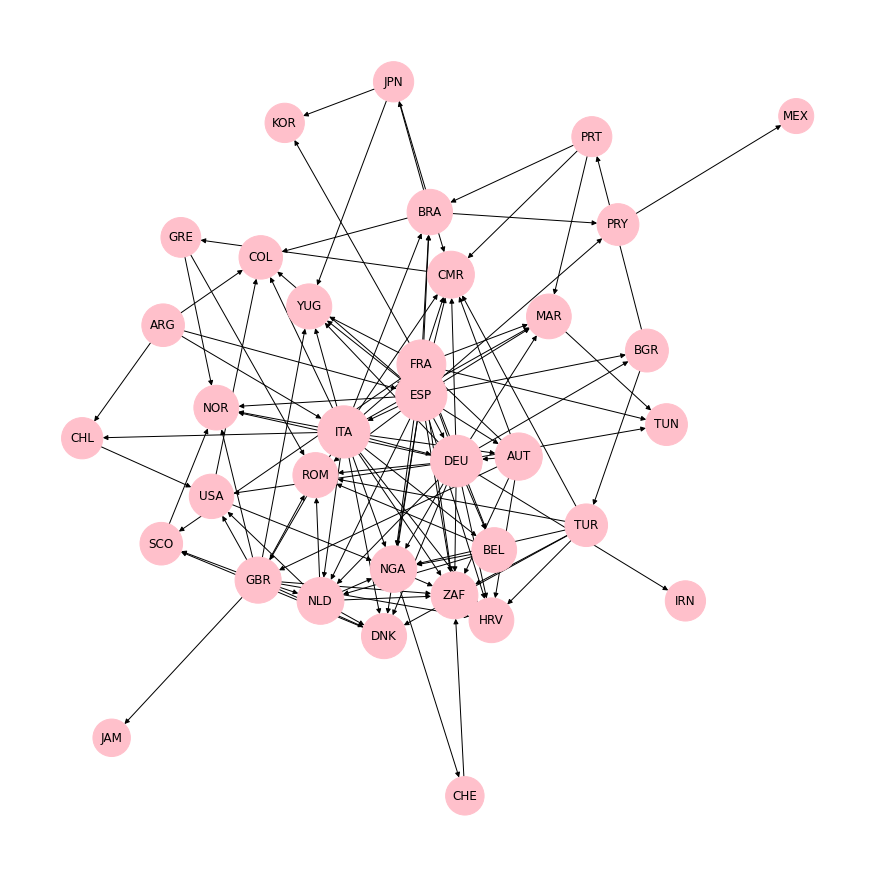

In [27]:
#Graph 4
E = nx.Graph()
E.add_edges_from(cen)
size = [x*4000 for x in list(nx.closeness_centrality(E).values())]

plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(E) 
nx.draw(E, with_labels=True, node_color='pink', node_size=size, edge_cmap=plt.cm.Blues, arrows=True, pos = pos)
plt.show()

In [28]:
OrderedDict(sorted(nx.closeness_centrality(E).items()))

OrderedDict([('ARG', 0.4533333333333333),
             ('AUT', 0.5573770491803278),
             ('BEL', 0.5),
             ('BGR', 0.4594594594594595),
             ('BRA', 0.5151515151515151),
             ('CHE', 0.3695652173913043),
             ('CHL', 0.425),
             ('CMR', 0.5483870967741935),
             ('COL', 0.4722222222222222),
             ('DEU', 0.6666666666666666),
             ('DNK', 0.5074626865671642),
             ('ESP', 0.6538461538461539),
             ('FRA', 0.5964912280701754),
             ('GBR', 0.53125),
             ('GRE', 0.3953488372093023),
             ('HRV', 0.5),
             ('IRN', 0.40476190476190477),
             ('ITA', 0.68),
             ('JAM', 0.35051546391752575),
             ('JPN', 0.40476190476190477),
             ('KOR', 0.38636363636363635),
             ('MAR', 0.5),
             ('MEX', 0.3063063063063063),
             ('NGA', 0.5396825396825397),
             ('NLD', 0.5483870967741935),
             ('NOR', 0.5),
  

The closeness centrality tells us how close one vertex is with another vertex in the network. The results obtained for closeness centrality are between the range (0.68 - 0.36), which implies the nodes in the network are strong. As most actors in the network are closely connected it means they would be able to disseminate information quickly. This could be beneficial as it means they have good relations to export and import players in the global player transfer network. There could also be positive network effects for less important hubs as their closeness to more important hubs may allow them to gain knowledge on player performance tactics. 

From graph 4 we can also see that most of the more economically developed countries are located closer together. The rich-club phenomenon refers to the tendency that well-connected nodes also connect to each other (Liu, 2016). This phenomenon may explain why more economically developed countries clustered closer together have performed better in the World Championships than less economically developed countries that are further away in the network.

Betweenness Centrality

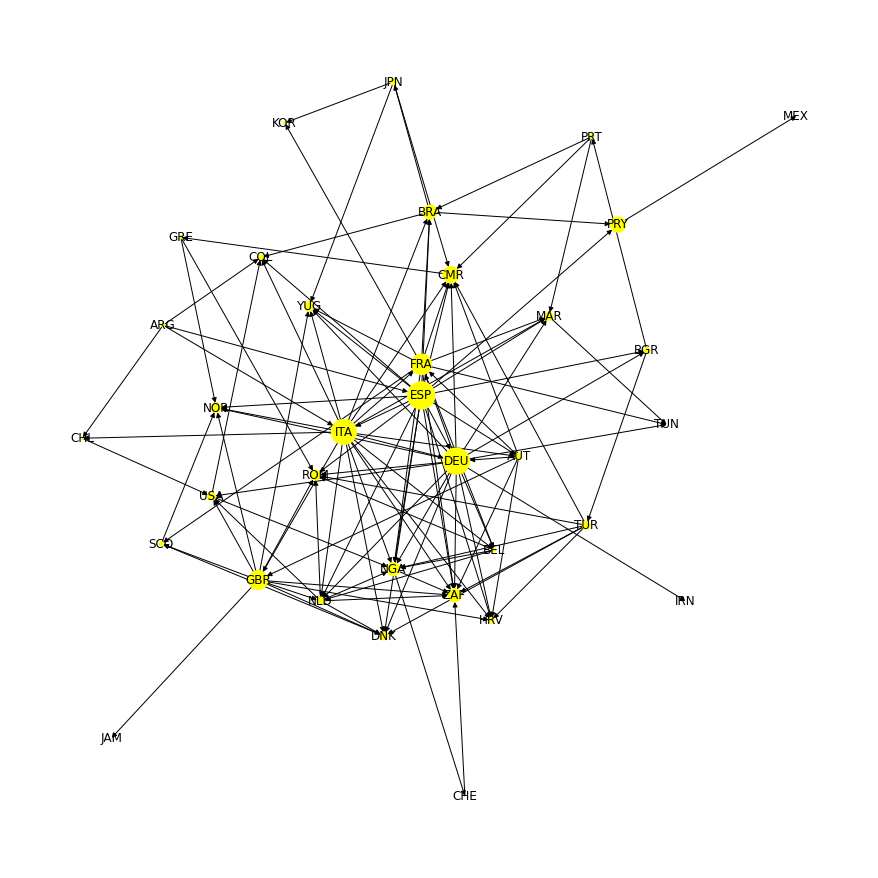

In [29]:
#Graph 5
F = nx.Graph()
F.add_edges_from(cen)
size = [x*4000 for x in list(nx.betweenness_centrality(F).values())]

plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(F) 
nx.draw(F, with_labels=True, node_color='yellow', node_size=size, edge_cmap=plt.cm.Blues, arrows=True, pos=pos)
plt.show()

In [30]:
OrderedDict(sorted(nx.betweenness_centrality(F).items()))

OrderedDict([('ARG', 0.0033174886116062586),
             ('AUT', 0.010354897234261369),
             ('BEL', 0.003785647903294962),
             ('BGR', 0.009164701064965567),
             ('BRA', 0.04846987829349395),
             ('CHE', 0.0),
             ('CHL', 0.0011883541295306),
             ('CMR', 0.06555186747671367),
             ('COL', 0.006805449452508276),
             ('DEU', 0.1730826946136651),
             ('DNK', 0.016226008212367977),
             ('ESP', 0.18804516767281115),
             ('FRA', 0.10653216656968596),
             ('GBR', 0.09132494395417746),
             ('GRE', 0.0022153871084352366),
             ('HRV', 0.007631008440897614),
             ('IRN', 0.0),
             ('ITA', 0.1575243939782506),
             ('JAM', 0.0),
             ('JPN', 0.010072951739618407),
             ('KOR', 0.0018078871020047488),
             ('MAR', 0.01752831803288936),
             ('MEX', 0.0),
             ('NGA', 0.04215679551485428),
             ('NLD', 0

The betweenness centrality tells us about the role of the vertex as a connector through which information can flow across the network. Germany, Spain, France and Italy have the highest values for betweenness centrality, meaning they are the most connected countries in terms of the relation they have with importing and exporting contracts from different countries. It also means they act as a direct intermediary between other countries. A large betweenness centrality can also indicate large global brokerage power (Liu, 2016), which means that these countries act as a bridge on the shortest path between two other countries. 

We can refer to the phenomenon of homophily as Germany, Spain, France and Italy have displayed characteristics of like-minded countries grouping together – they are similar in terms of their financial resource and economic development. This has resulted in them importing the most player contracts than other countries within the dataset.

Eigenvector Centrality

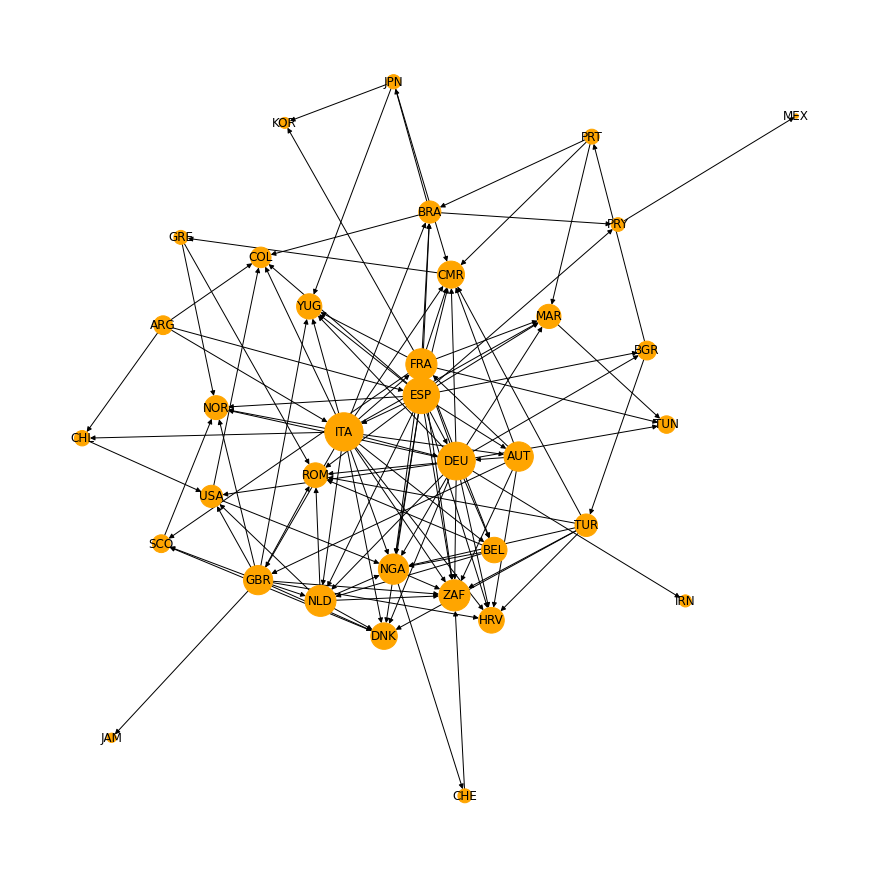

In [31]:
#Graph 6
G = nx.Graph()
G.add_edges_from(cen)
size = [x*4000 for x in list(nx.eigenvector_centrality(G).values())]

plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(G) 
nx.draw(G, with_labels=True, node_color='orange', node_size=size, edge_cmap=plt.cm.Blues, arrows=True, pos = pos)
plt.show()

In [32]:
OrderedDict(sorted(nx.eigenvector_centrality(G).items()))

OrderedDict([('ARG', 0.08812574361699062),
             ('AUT', 0.2147342618915475),
             ('BEL', 0.16227552878793472),
             ('BGR', 0.08881147454456426),
             ('BRA', 0.12254203973239342),
             ('CHE', 0.048257141278478626),
             ('CHL', 0.059124815277881104),
             ('CMR', 0.18330008301647718),
             ('COL', 0.10545488087111603),
             ('DEU', 0.3557037952908519),
             ('DNK', 0.17517032902531735),
             ('ESP', 0.32993495879888013),
             ('FRA', 0.24234826454881253),
             ('GBR', 0.21303965396492788),
             ('GRE', 0.04885226946596832),
             ('HRV', 0.16443543760621615),
             ('IRN', 0.036421194191558294),
             ('ITA', 0.3661553832815742),
             ('JAM', 0.02181351252667928),
             ('JPN', 0.05072193134955898),
             ('KOR', 0.030008030716540606),
             ('MAR', 0.14597837965173485),
             ('MEX', 0.0047941161095701205),
        

The eigenvector centrality tells us about the significance of a vertex according to the relative importance of the vertices connected to it. As we can see from the results, any country that is connected to the most significant hub e.g., France, Italy, Germany or Spain displays a greater value of eigenvector centrality than those countries that do not have that connection. This can be visually seen as the countries that are closer to the most significant hubs in the centre of graph 6 have a larger size node than those countries that are further from the centre. Italy has the highest eigenvector centrality value of 0.36 (rounded to 2dp) - this could indicate a strong attraction of the club to football players.

The overall winner of the 1998 Paris World Championship was France, and the loser was Japan. From the results we may argue that France had a competitive advantage as it was closely connected to other actors in the network, it acted as a strong connector to other countries in terms of the players imported, and it was a significant hub due to the number of vertices connected to it. These social network effects could have contributed to their success alongside club investment, coordination and interaction among team members in matches, and acquiring the most talented players from other countries (Liu, 2016). 

Meanwhile, results show that Japan was not a significant hub, and it was not very well connected in terms of the player contract relations it had with other countries. It did not import many player contracts and was not very well connected to the rest of the network. We could argue that Japan's lack of investment and limited exposure to network effects resulted in its downfall in the Paris World Championships.

Despite gaining a comprehensive understanding of the global player transfer network, the data still has its limitations. Network analysis and using measures of centrality assume the networks is static and does not consider the underlying dynamics. There are many historical aspects or societal and economic factors that impact the relations between actors in the network. It is also common in the football player transfer market for contracts to change with each season, and clubs tend to import and export players at different times according to financial resource. This makes it difficult to draw solid conclusions as network analysis fails to consider the constantly changing network structure.

# __Conclusions__

In this research, we leverage network analysis to build a global understanding of the players football market during the World Championships in Paris, 1998. In order to realise this, we have used concepts such as cluster analysis and measures of centrality to discover the nature of the relationship between countries in the network. Experimental results have shown that significant hubs that have more closely connected ties to other actors in the network achieved higher points and generally performed better in the Paris World Championships than their counterparts. The best performing countries tend to be more economically developed and we would assume they have superior player and financial resource to achieve best performance. In this increasingly competitive industry, losing clubs may have to seek better strategies to achieve match success. 

# __Workplace Reflection__

Through completing the football network analysis, I have developed skills with using appropriate Python libraries, interpreting different data structures and visualising the relations between key actors. An example of the analysis I completed for my workplace was to look at the concentration risk between cloud service providers and firms. I built the dataset using random fields and dummy variables to portray a fictitious scenario for this network analysis. 

In [33]:
cloud = pd.read_csv('cloud.csv')

In [34]:
G = nx.from_pandas_edgelist(cloud,
                           source='origin',
                           target='destination',
                           edge_attr ='count',
                           create_using=nx.Graph())

nx.info(G)

'Graph with 34 nodes and 78 edges'

In [35]:
sg = next(G.subgraph(c) for c in nx.connected_components(G))

In [36]:
pos = nx.kamada_kawai_layout(G)

In [37]:
G.edges

EdgeView([('BoI', 'ACCENTURE'), ('BoI', 'AWS'), ('BoI', 'BLOOM'), ('BoI', 'MSFT'), ('BoI', 'GOOG'), ('BoI', 'SLC'), ('BARC', 'AWS'), ('BARC', 'BLOOM'), ('BARC', 'GOOG'), ('BARC', 'MSFT'), ('AWS', 'CITI'), ('AWS', 'SANUK'), ('AWS', 'HSBC'), ('AWS', 'BNP'), ('AWS', 'COOP'), ('AWS', 'DB'), ('AWS', 'GS'), ('AWS', 'AIB'), ('AWS', 'BNYM'), ('AWS', 'JPM'), ('AWS', 'MONZO'), ('AWS', 'NOMURA'), ('AWS', 'UBS'), ('CITI', 'BLOOM'), ('CITI', 'GOOG'), ('CITI', 'MSFT'), ('CITI', 'SLC'), ('SANUK', 'BLOOM'), ('SANUK', 'GOOG'), ('SANUK', 'MSFT'), ('HSBC', 'BLOOM'), ('HSBC', 'GOOG'), ('BNP', 'MSFT'), ('BNP', 'GOOG'), ('BNP', 'PICO'), ('COOP', 'MSFT'), ('COOP', 'GOOG'), ('COOP', 'PHX'), ('COOP', 'PING'), ('DB', 'MSFT'), ('DB', 'GOOG'), ('DB', 'PHX'), ('DB', 'PLUM'), ('GS', 'MSFT'), ('GS', 'ORACLE'), ('GS', 'GOOG'), ('GS', 'PHX'), ('AIB', 'BLOOM'), ('AIB', 'BT'), ('BNYM', 'BT'), ('BNYM', 'MSFT'), ('BNYM', 'GOOG'), ('BNYM', 'ZOOM'), ('JPM', 'BLOOM'), ('JPM', 'MSFT'), ('JPM', 'NEXUS'), ('JPM', 'GOOG'), ('JPM

In [38]:
cen = [('BoI', 'ACCENTURE'), ('BoI', 'AWS'), ('BoI', 'BLOOM'), ('BoI', 'MSFT'), ('BoI', 'GOOG'), ('BoI', 'SLC'), ('BARC', 'AWS'), ('BARC', 'BLOOM'), ('BARC', 'GOOG'), ('BARC', 'MSFT'), ('AWS', 'CITI'), ('AWS', 'SANUK'), ('AWS', 'HSBC'), ('AWS', 'BNP'), ('AWS', 'COOP'), ('AWS', 'DB'), ('AWS', 'GS'), ('AWS', 'AIB'), ('AWS', 'BNYM'), ('AWS', 'JPM'), ('AWS', 'MONZO'), ('AWS', 'NOMURA'), ('AWS', 'UBS'), ('CITI', 'BLOOM'), ('CITI', 'GOOG'), ('CITI', 'MSFT'), ('CITI', 'SLC'), ('SANUK', 'BLOOM'), ('SANUK', 'GOOG'), ('SANUK', 'MSFT'), ('HSBC', 'BLOOM'), ('HSBC', 'GOOG'), ('BNP', 'MSFT'), ('BNP', 'GOOG'), ('BNP', 'PICO'), ('COOP', 'MSFT'), ('COOP', 'GOOG'), ('COOP', 'PHX'), ('COOP', 'PING'), ('DB', 'MSFT'), ('DB', 'GOOG'), ('DB', 'PHX'), ('DB', 'PLUM'), ('GS', 'MSFT'), ('GS', 'ORACLE'), ('GS', 'GOOG'), ('GS', 'PHX'), ('AIB', 'BLOOM'), ('AIB', 'BT'), ('BNYM', 'BT'), ('BNYM', 'MSFT'), ('BNYM', 'GOOG'), ('BNYM', 'ZOOM'), ('JPM', 'BLOOM'), ('JPM', 'MSFT'), ('JPM', 'NEXUS'), ('JPM', 'GOOG'), ('JPM', 'PHX'), ('MONZO', 'BLOOM'), ('MONZO', 'LEXIS'), ('MONZO', 'MSFT'), ('MONZO', 'GOOG'), ('MONZO', 'SLC'), ('NOMURA', 'BLOOM'), ('NOMURA', 'HP'), ('NOMURA', 'MSFT'), ('NOMURA', 'GOOG'), ('NOMURA', 'SLC'), ('UBS', 'BLOOM'), ('UBS', 'IBM'), ('UBS', 'MSFT'), ('UBS', 'GOOG'), ('UBS', 'SLC'), ('BLOOM', 'VIRGIN'), ('VIRGIN', 'HORIZON'), ('VIRGIN', 'MSFT'), ('VIRGIN', 'GOOG'), ('VIRGIN', 'SLC')]

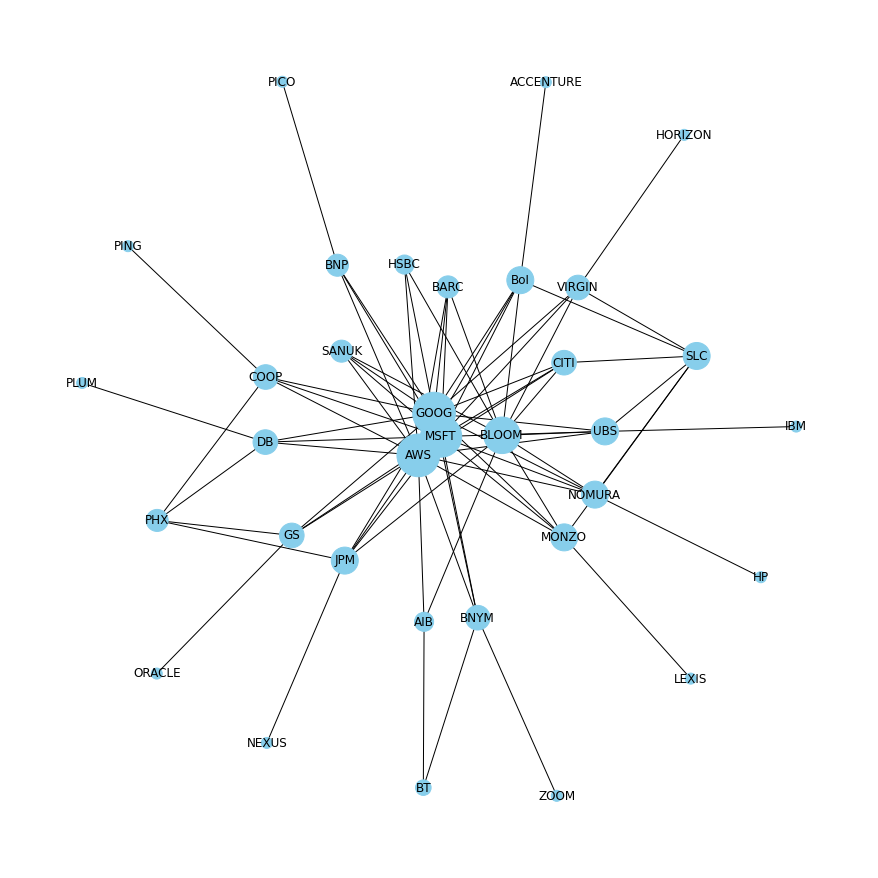

In [39]:
#Graph 7
G = nx.Graph()
G.add_edges_from(cen)
size = [x*4000 for x in list(nx.degree_centrality(G).values())]  

plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(G) 
nx.draw(G, with_labels=True, node_color='skyblue', node_size=size, edge_cmap=plt.cm.Blues, arrows=False, pos = pos)
plt.show()

We can conclude from the analysis conducted in graph 7 that the larger the size of the node, the more connected the cloud service provider is to other firms e.g., we can see that Google, Microsoft, AWS and Bloomberg are the most popular cloud service providers since they are highly connected and have the largest nodes in the sample. The concentrated area in the centre of the graph could highlight a sign of vulnerability and may have systemic consequences to financial stability if all firms are in outsourcing agreements with these key service providers. The cloud service providers around the outside of the graph are more dispersed since they are less interconnected to different firms within the network.

This analysis has enabled me to critically evaluate data science problems and select the appropriate programming methodologies to analyse workplace problems. I hope to continue leveraging these skills to inform decision making in my workplace and make appropriate recommendations to stakeholders. 

# __References__

Backurs, A., Roditty, L., Segal, G., Vassilevska Williams, V. and Wein, N., 2021. [online] Arxiv.org. Available at: <https://arxiv.org/pdf/1808.08494.pdf> [Accessed 26 February 2022].

Ec.europa.eu. 2013. [online] Available at: <https://ec.europa.eu/assets/eac/sport/library/documents/cons-study-transfers-final-rpt.pdf> [Accessed 28 February 2022].

En.wikipedia.org. 2022. 1998 FIFA World Cup - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/1998_FIFA_World_Cup#Final_standings> [Accessed 28 February 2022].

KLEINBERG, J., 2022. SVG. [online] Mrvar.fdv.uni-lj.si. Available at: <http://mrvar.fdv.uni-lj.si/sola/info4/andrej/footeng.htm> [Accessed 28 February 2022].

Krempel, L., 2005. Pajek data: World Soccer Data Paris 1998. [online] Vlado.fmf.uni-lj.si. Available at: <http://vlado.fmf.uni-lj.si/pub/networks/data/sport/football.htm> [Accessed 26 February 2022].

Krempel, L., 2022. Dagstuhl 2001 / Pajek: Football (soccer) players. [online] Vlado.fmf.uni-lj.si. Available at: <http://vlado.fmf.uni-lj.si/pub/networks/doc/dagstuhl/football.htm> [Accessed 28 February 2022].

Liu, X., 2016. [online] Journals.plos.org. Available at: <https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0156504&type=printable> [Accessed 28 February 2022].

Networkx.org. 2022. MultiDiGraph—Directed graphs with self loops and parallel edges — NetworkX 2.6.2 documentation. [online] Available at: <https://networkx.org/documentation/stable/reference/classes/multidigraph.html> [Accessed 26 February 2022].

Sayama, H., 2020. 17.6: Assortativity. [online] Mathematics LibreTexts. Available at: <https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/17%3A_Dynamical_Networks_II__Analysis_of_Network_Topologies/17.06%3A_Assortativity> [Accessed 27 February 2022].

Sparkandshine.net. 2022. Calculate a maximal independent set with Python – Spark & Shine. [online] Available at: <http://sparkandshine.net/en/calculate-a-maximal-independent-set-with-python/> [Accessed 27 February 2022].

 Worldpopulationreview.com. 2022. Developed Countries List 2022. [online] Available at: <https://worldpopulationreview.com/country-rankings/developed-countries> [Accessed 28 February 2022].
